In [2]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import awkward as ak
from utilities import *
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [3]:
# Importing data and converting to numpy
DFs = import_data_files(["l1calo_hist_ZMUMU_extended.root", "l1calo_hist_EGZ_extended.root"])

accepted_numpy = ak.to_numpy(DFs[0]['SuperCell_ET'])
rejected_numpy = ak.to_numpy(DFs[1]['SuperCell_ET'])

In [4]:
# Preparing data for training and testing
accepted_labels = np.zeros(accepted_numpy.shape[0])
rejected_labels = np.ones(rejected_numpy.shape[0])

data = np.concatenate((accepted_numpy,rejected_numpy),axis=0)
labels = np.concatenate((accepted_labels,rejected_labels),axis=0)

np.random.seed(42)
np.random.shuffle(data)
np.random.seed(42)
np.random.shuffle(labels)

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [5]:
# Initialise model and train SVM with rbf kernel
svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_classifier.fit(X_train, y_train)

SVC(random_state=42)

In [ ]:
# Generate predictions on test data, determine difference between prediction and true classifications, evaluate and display accuracy
y_pred = svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n",classification_report(y_test, y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred))

Accuracy: 0.97
Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.96      0.97     28387
         1.0       0.93      0.98      0.96     17795

    accuracy                           0.97     46182
   macro avg       0.96      0.97      0.96     46182
weighted avg       0.97      0.97      0.97     46182

Confusion Matrix:
 [[27132  1255]
 [  356 17439]]


In [7]:
tsne = TSNE(n_components=2, random_state=42)  
X_test_embedded = tsne.fit_transform(X_test) 

[1. 0. 1. ... 0. 0. 1.]
[1. 0. 1. ... 0. 0. 1.]
[False False False ... False False False]


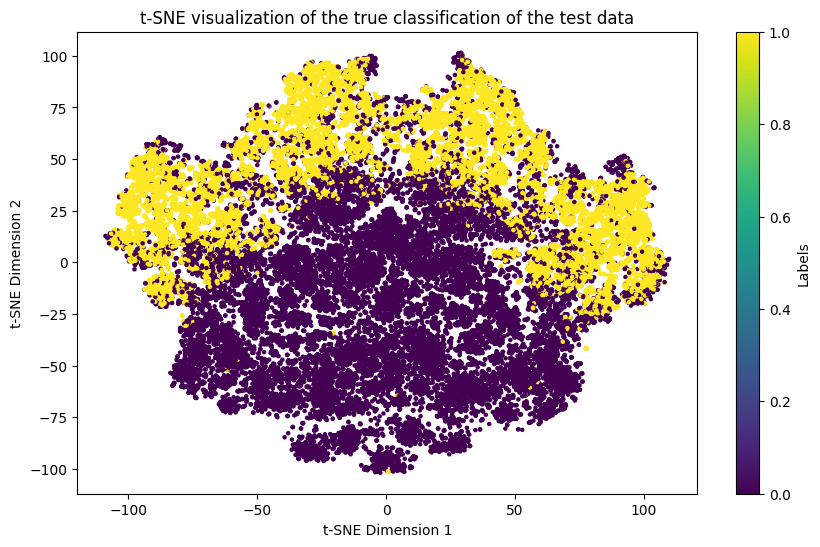

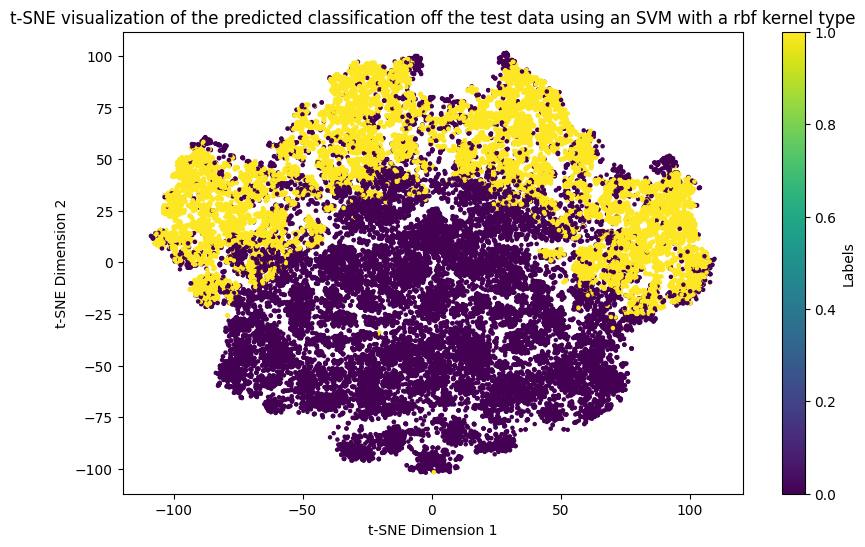

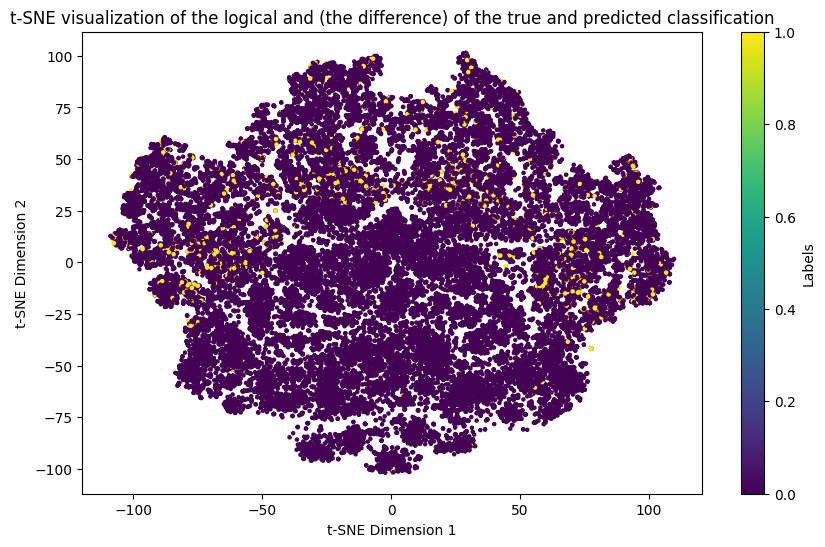

In [ ]:

# Visualise TSNE of the true classification, predicted classification and difference between the true and predicted classification
y_diff = np.logical_xor(y_test, y_pred) 

print(y_test)
print(y_pred)
print(y_diff)

plt.figure(figsize=(10, 6))
plt.scatter(X_test_embedded[:, 0], X_test_embedded[:, 1], c=y_test, cmap='viridis', s=5)
plt.colorbar(label="Labels")
plt.title("t-SNE visualization of the true classification of the test data")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(X_test_embedded[:, 0], X_test_embedded[:, 1], c=y_pred, cmap='viridis', s=5)
plt.colorbar(label="Labels")
plt.title("t-SNE visualization of the predicted classification off the test data using an SVM with a rbf kernel type")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(X_test_embedded[:, 0], X_test_embedded[:, 1], c=y_diff, cmap='viridis', s=5) 
plt.colorbar(label="Labels")
plt.title("t-SNE visualization of the logical xor of the true and predicted classification, where they differ")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()

In [11]:
tsne_3D = TSNE(n_components=3, random_state=42)  
X_test_embedded_3D = tsne.fit_transform(X_test) 

In [22]:
fig = px.scatter_3d(x=X_test_embedded_3D[:, 0], y=X_test_embedded_3D[:, 1],z=X_test_embedded_3D[:, 2],color=y_test)
fig.update_traces(marker=dict(line=dict(width=0),size=np.ones(y_test.shape)*2))
fig.show()


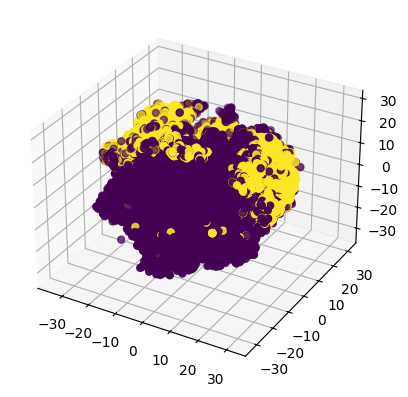

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test_embedded_3D[:,0], X_test_embedded_3D[:,1], X_test_embedded_3D[:,2], c= y_test, s = 100, marker='.')
